
# <span style='color:green;font-size:200%'> Gráficos de COVID-19 por paises</span>
***

## <span style='color:blue;font-size:100%'> Paises selecionados:</span>
* USA        
* Brasil   
* Alemanha
* Itália   
* Russia

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from read_covid19 import read

## <span style='color:red;font-size:100%'> Atualiza do dataset</span>

In [14]:
new = True

In [15]:
if new:    
    read()

---

In [16]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [17]:
dados_grupo = dados.groupby('Pais')

In [18]:
dados_grupo.get_group('Brasil').tail(n=10)

,Data,Casos,Mortes,Pais,Dias,Casos_Media,Mortes_Media,Taxa_Casos_Media,Taxa_Mortes_Media,Taxa_Casos,Taxa_Mortes,Porcentagem,Porcentagem_Media
199,14/06/2020,867624,43332,Brasil,89,7.955867e+05,40574.142857,25837.000000,975.000000,20647.0,627.0,4.99,4.99
200,15/06/2020,888271,43959,Brasil,90,8.214237e+05,41549.142857,26240.857143,976.428571,34918.0,1282.0,4.95,4.95
201,16/06/2020,923189,45241,Brasil,91,8.476646e+05,42525.571429,26137.285714,975.714286,32188.0,1269.0,4.90,4.90
202,17/06/2020,955377,46510,Brasil,92,8.738019e+05,43501.285714,25044.857143,975.571429,22765.0,1238.0,4.87,4.87
203,18/06/2020,978142,47748,Brasil,93,8.988467e+05,44476.857143,29157.571429,1018.000000,54771.0,1206.0,4.88,4.88
204,19/06/2020,1032913,48954,Brasil,94,9.280043e+05,45494.857143,31009.285714,1036.571429,34666.0,1022.0,4.74,4.74
205,20/06/2020,1067579,49976,Brasil,95,9.590136e+05,46531.428571,30816.714286,1037.000000,15762.0,615.0,4.68,4.68
206,21/06/2020,1083341,50591,Brasil,96,9.898303e+05,47568.428571,31171.285714,1044.571429,23129.0,680.0,4.67,4.67
207,22/06/2020,1106470,51271,Brasil,97,1.021002e+06,48613.000000,31816.714286,1057.714286,39436.0,1374.0,4.63,4.63
208,23/06/2020,1145906,52645,Brasil,98,1.052818e+06,49670.714286,NaN,NaN,NaN,NaN,4.59,4.59


In [19]:
#paises = ['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]
paises = ['USA', 'Brasil', 'Alemanha', 'Itália', 'Russia' ]
paises_sem = ['Brasil', 'Russia', 'Itália', 'USA']
# cores
cor = { 'Brasil'   :      'black',
         'USA'     :       'blue',
         'Itália'  :          'm',
         'Espanha' :        'red',
         'Russia'  : 'darkorange',
         'Alemanha':       'green'}
# transparencia

alpha ={ 'Brasil'   :     1.0,
         'USA'     :      0.6,
         'Itália'  :      0.6,
         'Espanha' :      0.6,
         'Russia'  :      0.6,
         'Alemanha':      0.6}

#
mar = { 'Brasil'   :     None,
         'USA'     :      'o',
         'Itália'  :      '^',
         'Espanha' :      'x',
         'Russia'  :      's',
         'Alemanha':      'p'}

#
lw = { 'Brasil'   :     3,
         'USA'     :     1,
         'Itália'  :     1,
         'Espanha' :     1,
         'Russia'  :     1,
         'Alemanha':     1}

# divisao do eixo x
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico em logY dos casos totais confirmados</span>
---

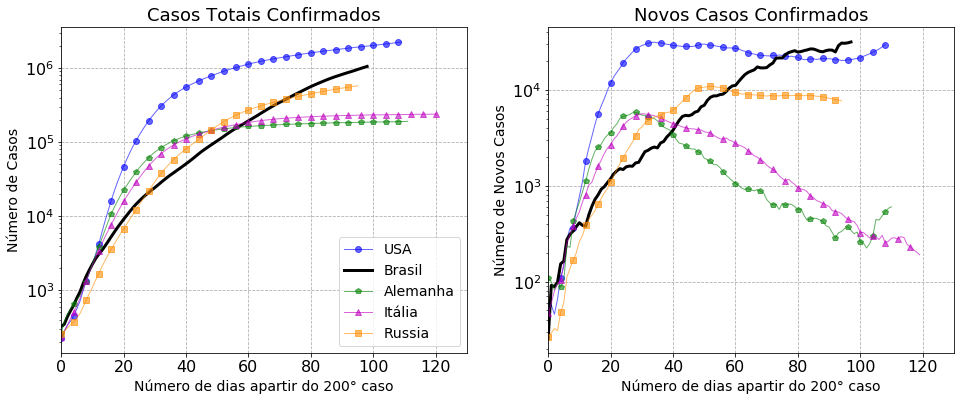

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)

    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 130)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 130)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novos Casos', fontsize = 14)
ax2.set_title('Novos Casos Confirmados', fontsize = 18)
ax2.grid(ls = '--')

ax1

In [21]:
fig.savefig('casos.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

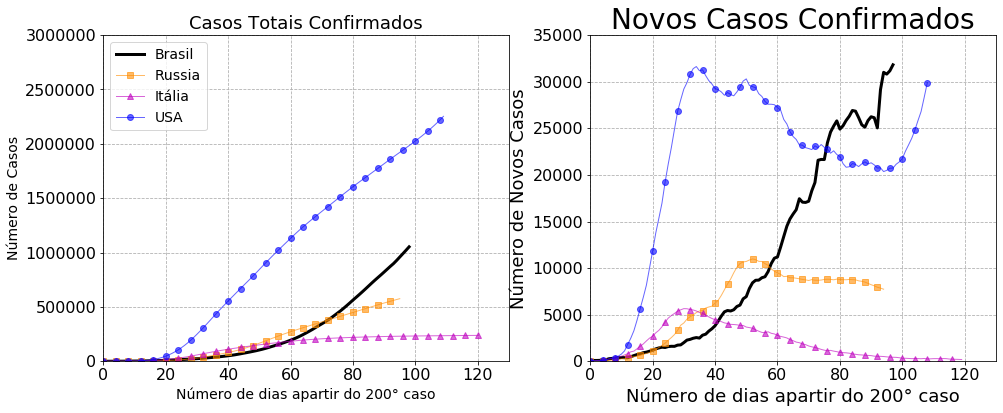

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)

    ax2.plot(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Casos_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
# eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 130)
ax1.set_ylim(0, 3000000)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Casos', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Casos Totais Confirmados', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 130)
ax2.set_ylim(0, 35000)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novos Casos', fontsize = 18)
ax2.set_title('Novos Casos Confirmados', fontsize = 28)
ax2.grid(ls = '--')

ax1

----
----
## <span style='color:green;font-size:150%'> Plotando o gráfico logY de mortes confirmadas</span>
---

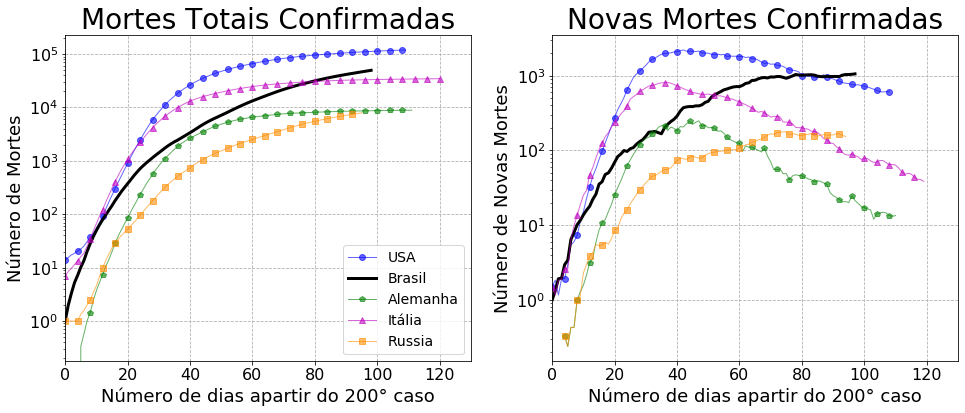

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises):
    ax1.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Mortes_Media'].get_group(name), 
                 label  = name, 
                 ls     = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
    
    ax2.semilogy(dados_grupo.get_group(name).Dias, 
                 dados_grupo['Taxa_Mortes_Media'].get_group(name), 
                 label = name, 
                 ls    = '-',
                 marker = mar[name],
                 color  = cor[name],
                 lw     = lw[name],
                 alpha  = alpha[name],
                 markevery = 4)
#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 130)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax1.set_ylabel('Número de Mortes', fontsize = 18)
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 28)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 130)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 18)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 28)
ax2.grid(ls = '--')

ax1

In [24]:
fig.savefig('mortes.png', dpi = 300)

---
## <span style='color:green;font-size:150%'> Plotando o gráfico dos casos totais confirmados</span>
---

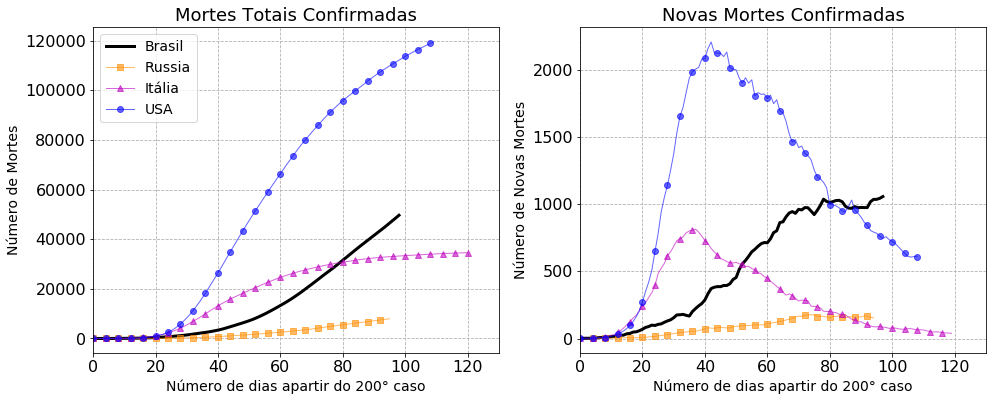

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(paises_sem):
    ax1.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)
    
    ax2.plot(dados_grupo.get_group(name).Dias, 
             dados_grupo['Taxa_Mortes_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)

#eixo 1
    
# Set the tick labels font
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)

ax1.set_xlim(0, 130)
ax1.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax1.set_ylabel('Número de Mortes', fontsize = 14)
ax1.legend(loc = 'upper left', fontsize = 14)
ax1.set_title('Mortes Totais Confirmadas', fontsize = 18)
ax1.grid(ls = '--')

# eixo 2

# Set the tick labels font
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(16)
    
ax2.set_xlim(0, 130)
ax2.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax2.set_ylabel('Número de Novas Mortes', fontsize = 14)
ax2.set_title('Novas Mortes Confirmadas', fontsize = 18)
ax2.grid(ls = '--')

ax1

---
---
##  <span style='color:green;font-size:150%'> Plotando Porcentagem de Mortes </span>
-----

### $n_{casos} \rightarrow $  número total de casos confirmadas
### $n_{mortes}\rightarrow $  número total de mortes confirmadas

### $p = \frac{n_{mortes}}{n_{casos}} \times 100\rightarrow $ Porcentual de mortes


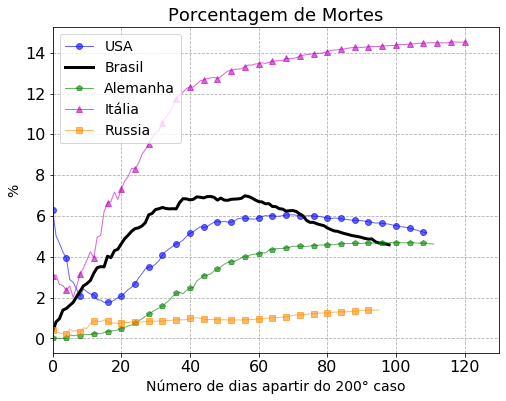

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

for i, name in enumerate(paises):
    ax.plot(dados_grupo.get_group(name).Dias,
            dados_grupo['Porcentagem_Media'].get_group(name), 
             label = name, 
             ls    = '-',
             marker = mar[name],
             color  = cor[name],
             lw     = lw[name],
             alpha  = alpha[name],
             markevery = 4)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 130)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 14)
ax.set_ylabel('%', fontsize = 14)
ax.legend(loc = 'upper left', fontsize = 14)
ax.set_title('Porcentagem de Mortes', fontsize = 18)
ax.grid(ls = '--')

ax

In [27]:
fig.savefig('porcentagem_de_mortos.png', dpi = 300)

---
---